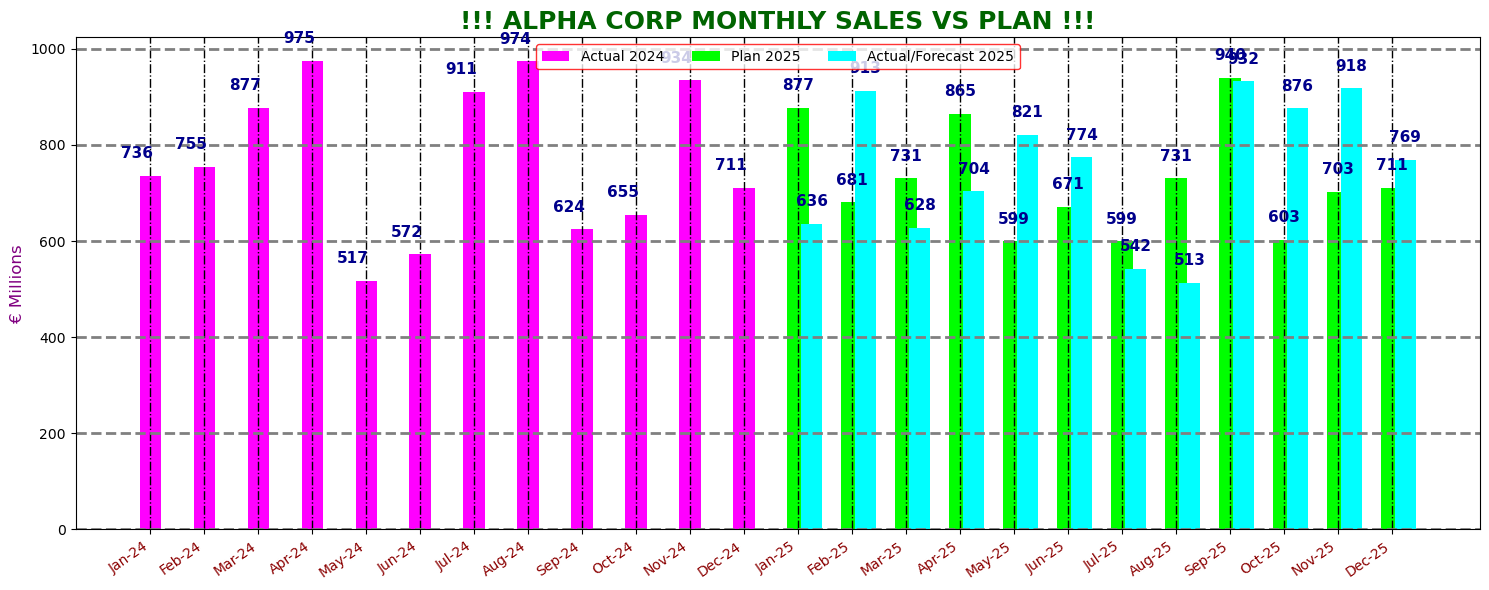

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data preparation
months = pd.date_range("2024-01-01", "2025-12-01", freq="MS")
labels = [m.strftime("%b-%y") for m in months]

# generate fake data
rng = np.random.default_rng(42)  # fixed seed
sales_2024 = rng.integers(500, 1000, 12)
sales_2025_actual = rng.integers(500, 1000, 3)   # Jan–Mar actual
sales_2025_forecast = rng.integers(500, 1000, 9) # Apr–Dec forecast
sales_2025_plan = rng.integers(550, 950, 12)     # plan values

# dataframe creation
df = pd.DataFrame({
    "Month": months,
    "Label": labels,
    "2024_actual": list(sales_2024) + [np.nan]*12,
    "2025_plan": [np.nan]*12 + list(sales_2025_plan),
    "2025_actual": [np.nan]*12 + list(sales_2025_actual) + [np.nan]*9,
    "2025_forecast": [np.nan]*12 + [np.nan]*3 + list(sales_2025_forecast)
})
df["2025_actual_forecast"] = df["2025_actual"].fillna(df["2025_forecast"])

# uggly ass chart
fig, ax = plt.subplots(figsize=(15, 6))

# really fancy coloring
ax.bar(df.index, df["2024_actual"], width=0.4, color="magenta", label="Actual 2024")
ax.bar(df.index, df["2025_plan"], width=0.4, color="lime", label="Plan 2025")
ax.bar(df.index + 0.25, df["2025_actual_forecast"], width=0.4, color="cyan", label="Actual/Forecast 2025")

#labels above
for col, shift in zip(["2024_actual", "2025_plan", "2025_actual_forecast"], [-0.25, 0, 0.25]):
    for i, v in enumerate(df[col]):
        if not np.isnan(v):
            ax.text(i + shift, v + 30, str(int(v)),
                    ha="center", va="bottom",
                    fontsize=11, color="darkblue", weight="bold")

# X-axis labels rotated
ax.set_xticks(df.index)
ax.set_xticklabels(df["Label"], rotation=35, ha="right", color="darkred")

# Heavy grid lines (ugly style)
ax.grid(True, axis="y", linestyle="--", color="grey", linewidth=2)
ax.grid(True, axis="x", linestyle="-.", color="black", linewidth=1)

# Oversized title with exclamation marks
ax.set_title("!!! ALPHA CORP MONTHLY SALES VS PLAN !!!",
             fontsize=18, color="darkgreen", weight="bold")

# Y-axis label
ax.set_ylabel("€ Millions", fontsize=12, color="purple")

# legend
ax.legend(loc="upper center", ncol=3, frameon=True, edgecolor="red")

plt.tight_layout()
plt.show()
